# Tree-Based Models for Mortality Prediction in FHS: Iterative Looper

## Setup

### Importing libraries

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Filenames to loop through

In [3]:
f_names = [r'C:\Users\danie\Desktop\CICOM\FHS_medi\fhs_imp_1_pyth.csv',
          r'C:\Users\danie\Desktop\CICOM\FHS_medi\fhs_imp_2_pyth.csv',
          r'C:\Users\danie\Desktop\CICOM\FHS_medi\fhs_imp_3_pyth.csv',
          r'C:\Users\danie\Desktop\CICOM\FHS_medi\fhs_imp_4_pyth.csv',
          r'C:\Users\danie\Desktop\CICOM\FHS_medi\fhs_imp_5_pyth.csv']

nums = [1,2,3,4,5]
exports_rf_train = ['train_rf_res_imp' + str(x) + '.csv' for x in nums]
exports_rf_test = ['test_rf_res_imp' + str(x) + '.csv' for x in nums]
exports_xgb_train = ['train_xgb_res_imp' + str(x) + '.csv' for x in nums]
exports_xgb_test = ['test_xgb_res_imp' + str(x) + '.csv' for x in nums]

## Model Metrics Helper Function

In [5]:
def model_metrics(model_obj, dataset_x, dataset_y, exp_name, mod_name, df_out = True):
    y_pred_probs = model_obj.predict_proba(dataset_x)[:,1]
    auc_score = roc_auc_score(dataset_y, y_pred_probs)
    
    # finding the best threshold
    fpr, tpr, thresholds = roc_curve(dataset_y, y_pred_probs)
    best_index = np.argmax(tpr - fpr) 
    best_threshold = thresholds[best_index]
    
    # outputting confusion matrix
    y_preds_optim = y_pred_probs >= best_threshold
    y_preds_optim = y_preds_optim.astype(int)
    cm_rf = confusion_matrix(dataset_y, y_preds_optim)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Class 0", "Class 1"]) # Adjust labels as needed
    disp.plot()
    plt.title("Confusion Matrix")
    plt.show()
    
    # outputting the model assessment metrics
    print('Model Metrics')
    tn, fp, fn, tp = confusion_matrix(dataset_y, y_preds_optim).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    precision = tp / (fp + tp)
    neg_pred_value = tn / (fn + tn)
    acc  = (tp + tn) / (tn + fp + fn + tp)
    
    print('AUC: ', round(auc_score*100,2))
    print('Accuracy: ', round(acc*100,2))
    print('Sensitivity: ', round(sensitivity*100,2))
    print('Specificity: ', round(specificity*100,2))
    print('Precision: ', round(precision*100,2))
    print('Negative Predictive Value: ', round(neg_pred_value*100,2))

    if (df_out):
        results_df = {'Model Name' : [mod_name],
             'AUC': [round(auc_score,3)],
             'Threshold': [round(best_threshold, 3)],
             'Accuracy' : [round(acc, 3)],
             'Sensitivity' : [round(sensitivity, 3)],
             'Specificity' : [round(specificity, 3)]}

        df_res = pd.DataFrame(results_df)
        df_res.to_csv(exp_name, index=False)

## Driver Code

C:\Users\danie\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


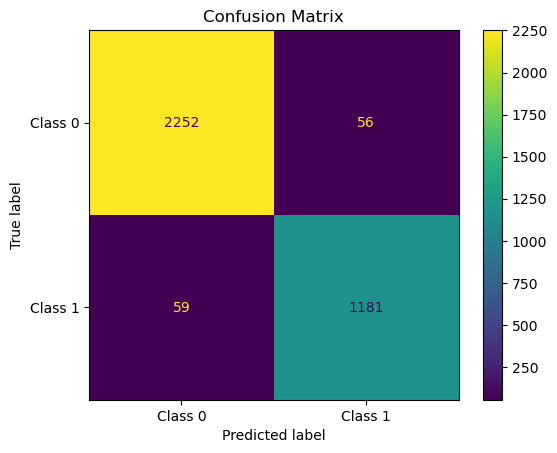

Model Metrics
AUC:  99.47
Accuracy:  96.76
Sensitivity:  95.24
Specificity:  97.57
Precision:  95.47
Negative Predictive Value:  97.45


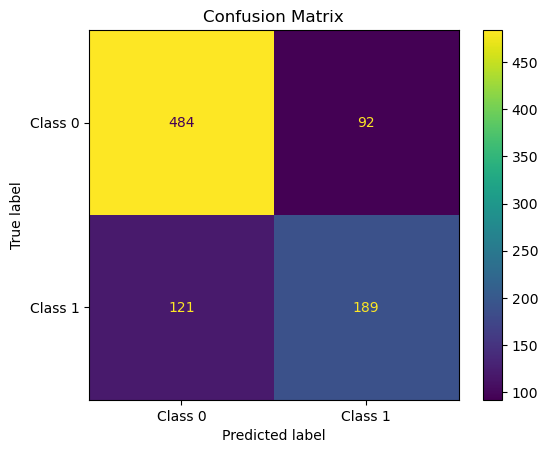

Model Metrics
AUC:  78.4
Accuracy:  75.96
Sensitivity:  60.97
Specificity:  84.03
Precision:  67.26
Negative Predictive Value:  80.0


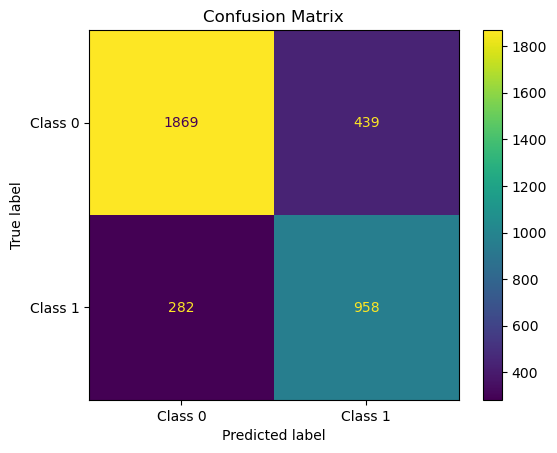

Model Metrics
AUC:  86.57
Accuracy:  79.68
Sensitivity:  77.26
Specificity:  80.98
Precision:  68.58
Negative Predictive Value:  86.89


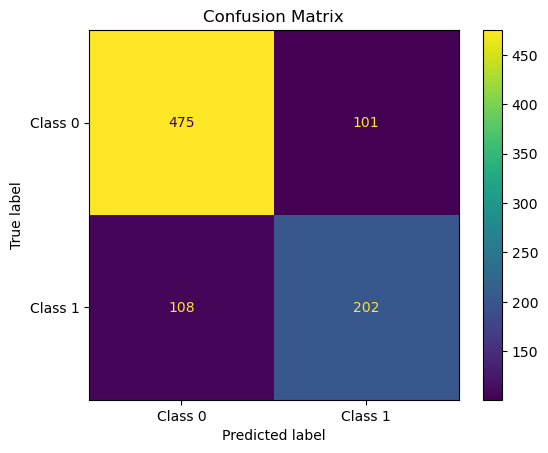

Model Metrics
AUC:  79.73
Accuracy:  76.41
Sensitivity:  65.16
Specificity:  82.47
Precision:  66.67
Negative Predictive Value:  81.48


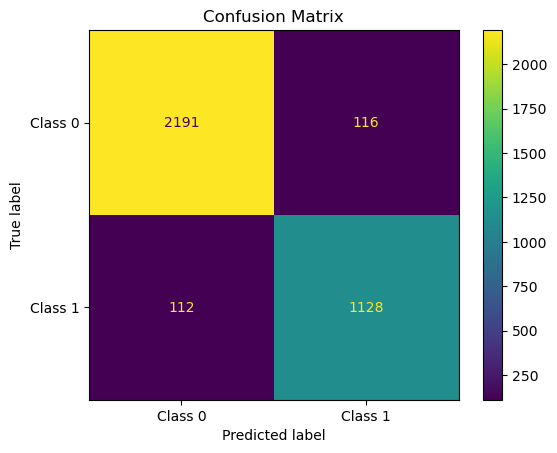

Model Metrics
AUC:  98.13
Accuracy:  93.57
Sensitivity:  90.97
Specificity:  94.97
Precision:  90.68
Negative Predictive Value:  95.14


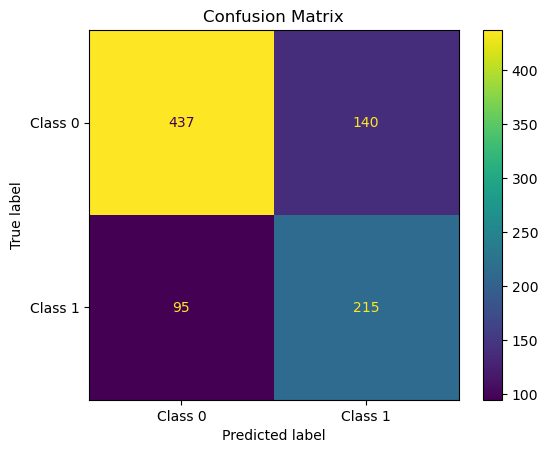

Model Metrics
AUC:  77.58
Accuracy:  73.51
Sensitivity:  69.35
Specificity:  75.74
Precision:  60.56
Negative Predictive Value:  82.14


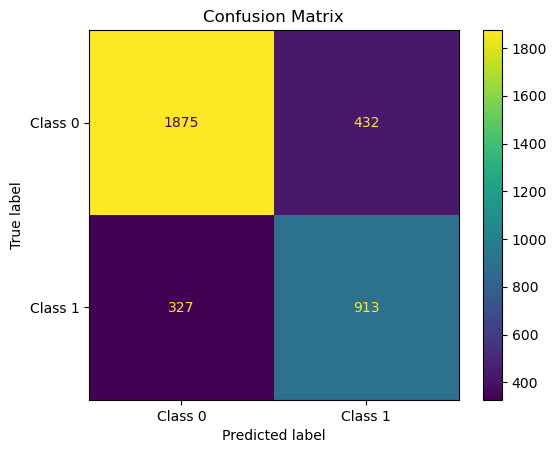

Model Metrics
AUC:  85.47
Accuracy:  78.6
Sensitivity:  73.63
Specificity:  81.27
Precision:  67.88
Negative Predictive Value:  85.15


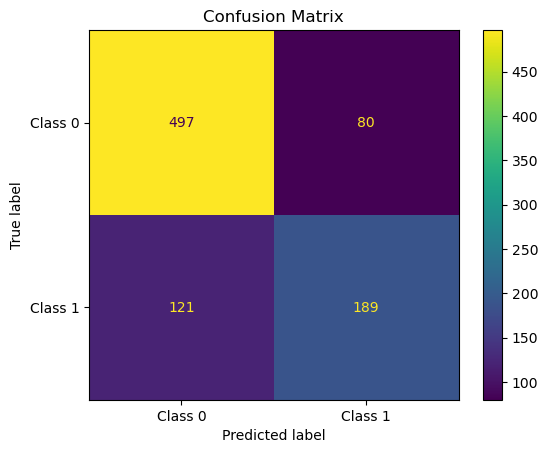

Model Metrics
AUC:  80.1
Accuracy:  77.34
Sensitivity:  60.97
Specificity:  86.14
Precision:  70.26
Negative Predictive Value:  80.42


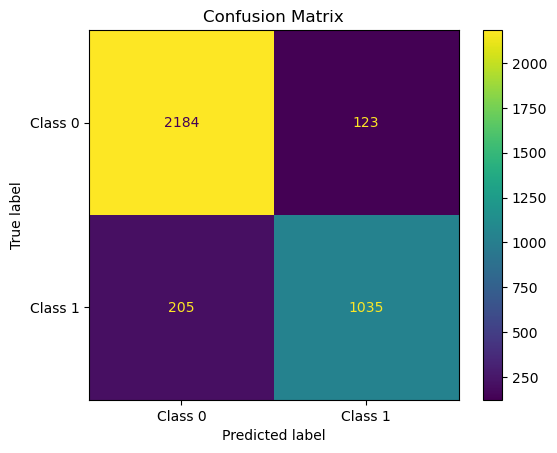

Model Metrics
AUC:  94.91
Accuracy:  90.75
Sensitivity:  83.47
Specificity:  94.67
Precision:  89.38
Negative Predictive Value:  91.42


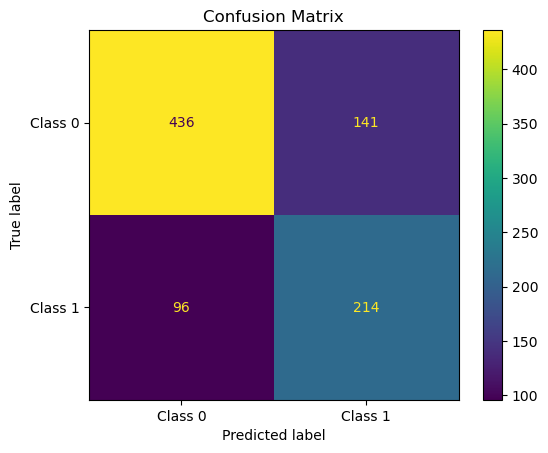

Model Metrics
AUC:  78.2
Accuracy:  73.28
Sensitivity:  69.03
Specificity:  75.56
Precision:  60.28
Negative Predictive Value:  81.95


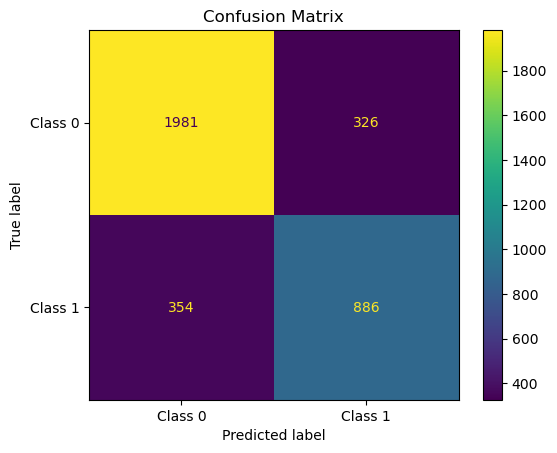

Model Metrics
AUC:  86.57
Accuracy:  80.83
Sensitivity:  71.45
Specificity:  85.87
Precision:  73.1
Negative Predictive Value:  84.84


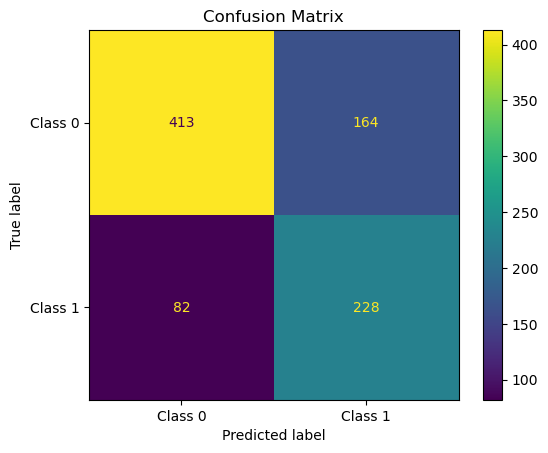

Model Metrics
AUC:  77.83
Accuracy:  72.27
Sensitivity:  73.55
Specificity:  71.58
Precision:  58.16
Negative Predictive Value:  83.43


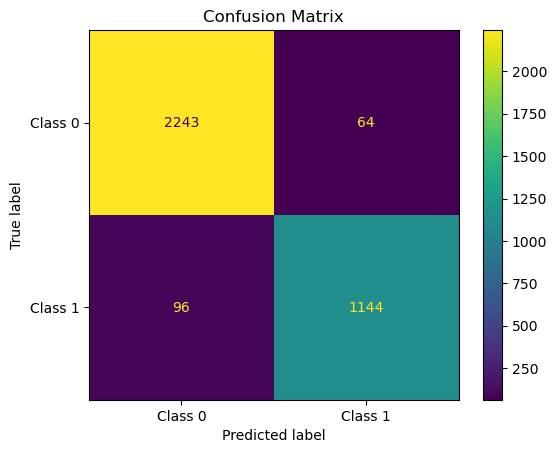

Model Metrics
AUC:  98.72
Accuracy:  95.49
Sensitivity:  92.26
Specificity:  97.23
Precision:  94.7
Negative Predictive Value:  95.9


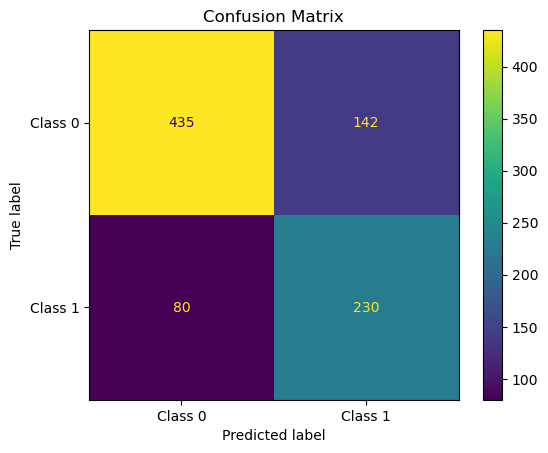

Model Metrics
AUC:  80.0
Accuracy:  74.97
Sensitivity:  74.19
Specificity:  75.39
Precision:  61.83
Negative Predictive Value:  84.47


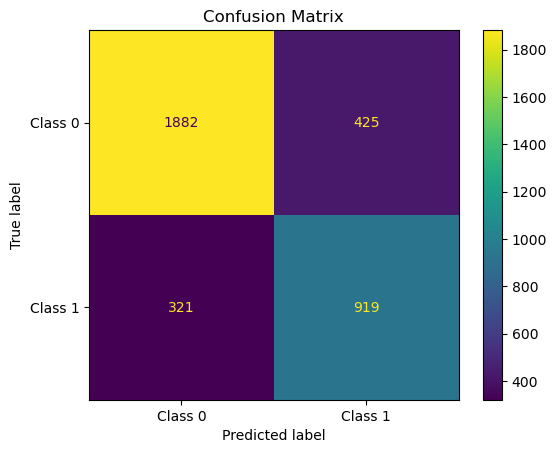

Model Metrics
AUC:  85.53
Accuracy:  78.97
Sensitivity:  74.11
Specificity:  81.58
Precision:  68.38
Negative Predictive Value:  85.43


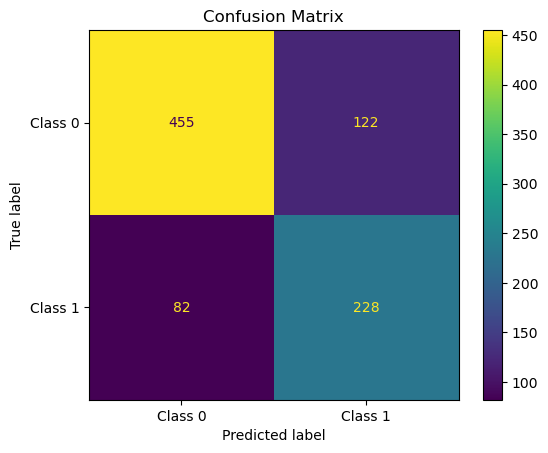

Model Metrics
AUC:  81.09
Accuracy:  77.0
Sensitivity:  73.55
Specificity:  78.86
Precision:  65.14
Negative Predictive Value:  84.73


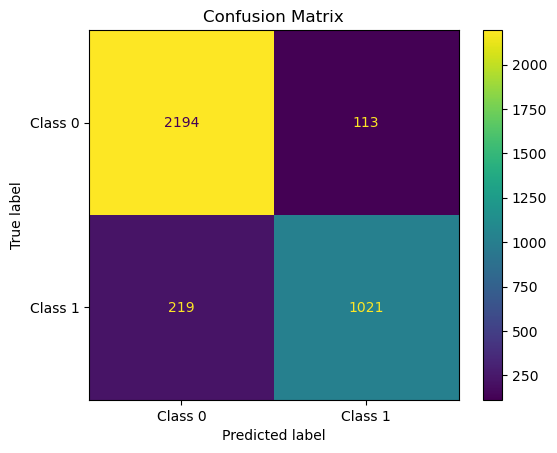

Model Metrics
AUC:  94.58
Accuracy:  90.64
Sensitivity:  82.34
Specificity:  95.1
Precision:  90.04
Negative Predictive Value:  90.92


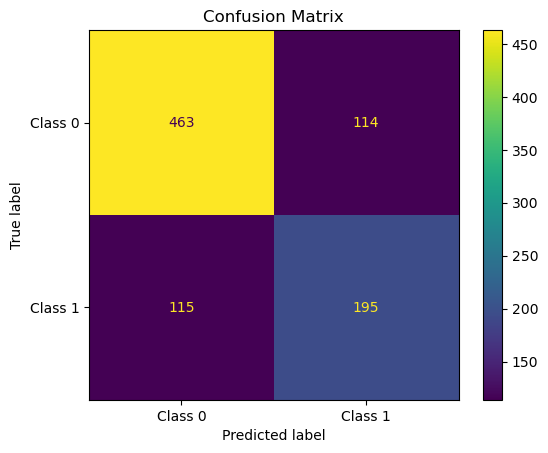

Model Metrics
AUC:  77.82
Accuracy:  74.18
Sensitivity:  62.9
Specificity:  80.24
Precision:  63.11
Negative Predictive Value:  80.1


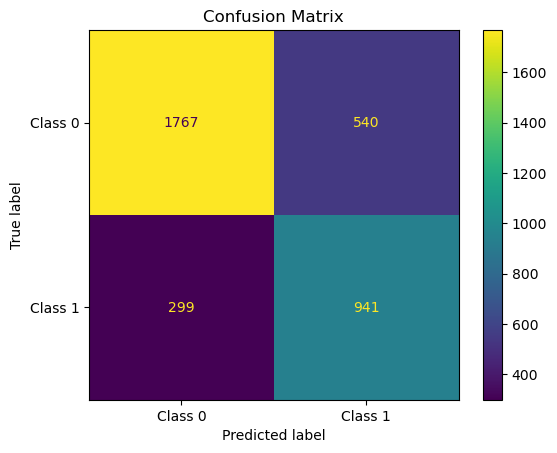

Model Metrics
AUC:  83.67
Accuracy:  76.35
Sensitivity:  75.89
Specificity:  76.59
Precision:  63.54
Negative Predictive Value:  85.53


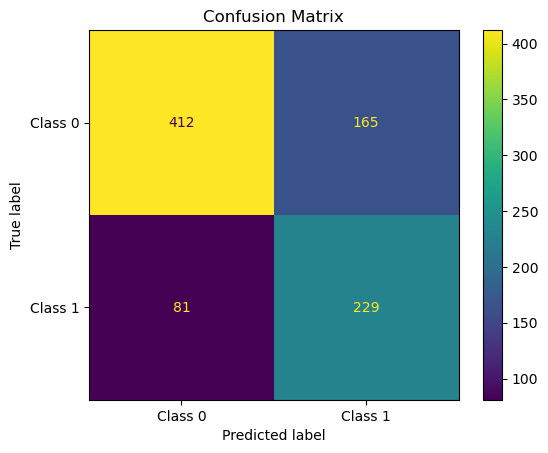

Model Metrics
AUC:  78.81
Accuracy:  72.27
Sensitivity:  73.87
Specificity:  71.4
Precision:  58.12
Negative Predictive Value:  83.57


In [7]:
for i in range(len(f_names)):
    
    # data import
    df = pd.read_csv(f_names[i])

    # file export names
    train_export_name_rf = exports_rf_train[i]
    train_export_name_xgb = exports_xgb_train[i]
    
    test_export_name_rf = exports_rf_test[i]
    test_export_name_xgb = exports_xgb_test[i]
    
    # pre-processing: Converted certain variables to factors
    categorical_vars = ['SEX', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'ANGINA',
           'HOSPMI', 'MI_FCHD', 'STROKE', 'CVD', 'ANYCHD', 'HYPERTEN',
           'DIABETES', 'DEATH']
    for col in categorical_vars:
        df[col] = df[col].astype('category')
    
    # pre-processing: Robust Scaler -  more robust to outliers
    scaler = preprocessing.RobustScaler()
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    # Train-Test Split (80/20)
    trains = df[df['label'] == 'train']
    tests = df[df['label'] == 'test']
    
    # splitting predictor and label
    X_train = trains.drop(['DEATH', 'label'], axis=1)
    y_train = trains['DEATH']
    X_test = tests.drop(['DEATH', 'label'], axis=1)
    y_test = tests['DEATH']
    
    
    # Random Forest
    param_grid = {
        'n_estimators': [x for x in range(20,110,10)],
        'max_features' : [x for x in range(2,round(0.7*len(X_train.columns))+1)],
        'max_depth': [x for x in range(2,round(0.7*len(X_train.columns))+1)],
        'criterion': ['gini', 'entropy'] # omit log loss because it is too sensitive to imbalance
    }
    
    grid_search = GridSearchCV(RandomForestClassifier(random_state=123), param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    model_grid = RandomForestClassifier(max_depth=grid_search.best_params_['max_depth'],
                                        max_features=grid_search.best_params_['max_features'],
                                        n_estimators=grid_search.best_params_['n_estimators'],
                                        criterion=grid_search.best_params_['criterion'],
                                        random_state=123)
    model_grid.fit(X_train, y_train)
    
    model_metrics(model_grid, X_train, y_train, train_export_name_rf, 'Random Forest')
    model_metrics(model_grid, X_test, y_test, test_export_name_rf, 'Random Forest')
    
    # XGboost
    param_grid_xgb = {
        'max_depth': [x for x in range(2,round(0.7*len(X_train.columns))+1)],
        'learning_rate': [0.1, 0.2, 0.3],
        'subsample': [0.5, 0.7, 1]
    }
    
    xgb_model = xgb.XGBClassifier(random_state=123, enable_categorical=True, eval_metric='auc')
    
    grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5)
    grid_xgb.fit(X_train, y_train)
    
    xgb_opt = xgb.XGBClassifier(max_depth=grid_xgb.best_params_['max_depth'],
                                learning_rate=grid_xgb.best_params_['learning_rate'],
                                subsample=grid_xgb.best_params_['subsample'],
                                enable_categorical=True,
                                random_state=123)
    
    xgb_opt.fit(X_train, y_train)
    
    model_metrics(xgb_opt, X_train, y_train, train_export_name_xgb, 'XGboost')
    model_metrics(xgb_opt, X_test, y_test, test_export_name_xgb, 'XGboost')